In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_train = pd.read_csv(r"C:\Users\barta\Documents\cours\iaprojets\projet_aa\part_1\data\raw\spotify_dataset_train.csv")
df_test = pd.read_csv(r"C:\Users\barta\Documents\cours\iaprojets\projet_aa\part_1\data\raw\spotify_dataset_test.csv")

In [9]:
"""X_copy['explicit_popularity'] = X_copy['explicit'] * X_copy['popularity']
        X_copy['speechiness_explicit'] = X_copy['speechiness'] * X_copy['explicit']
        X_copy['energy_loudness'] = X_copy['energy'] * X_copy['loudness']
        X_copy['energy_acoustic_ratio'] = X_copy['energy'] / (X_copy['acousticness'] + 1e-6)
        X_copy['loudness_acoustic_ratio'] = X_copy['loudness'] / (X_copy['acousticness'] + 1e-6)
        X_copy['impact_score'] = (X_copy['speechiness'] * X_copy['popularity'] * X_copy['danceability'] )
        X_copy['impact_score_explicit']=X_copy['impact_score']* X_copy['explicit']"""

"X_copy['explicit_popularity'] = X_copy['explicit'] * X_copy['popularity']\n        X_copy['speechiness_explicit'] = X_copy['speechiness'] * X_copy['explicit']\n        X_copy['energy_loudness'] = X_copy['energy'] * X_copy['loudness']\n        X_copy['energy_acoustic_ratio'] = X_copy['energy'] / (X_copy['acousticness'] + 1e-6)\n        X_copy['loudness_acoustic_ratio'] = X_copy['loudness'] / (X_copy['acousticness'] + 1e-6)\n        X_copy['impact_score'] = (X_copy['speechiness'] * X_copy['popularity'] * X_copy['danceability'] )\n        X_copy['impact_score_explicit']=X_copy['impact_score']* X_copy['explicit']"

In [10]:
#preprocessing 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

class MusicFeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.min_date_ = None

    def fit(self, X, y=None):
        dates = pd.to_datetime(X['release_date'], format='mixed')
        self.min_date_ = pd.Timestamp('1900-01-01')

        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['release_date'] = pd.to_datetime(X_copy['release_date'], format='mixed')
        X_copy['days_since_1900'] = (X_copy['release_date'] - self.min_date_).dt.days
    
        if 'explicit' in X_copy.columns:
            X_copy['explicit'] = X_copy['explicit'].astype(int)

        cols_to_drop = ['release_date']
        X_copy = X_copy.drop(columns=[c for c in cols_to_drop if c in X_copy.columns])
        
        return X_copy

X = df_train.drop(columns=['genre'])
y = df_train['genre']

pipeline_X = Pipeline([
    ('feature_eng', MusicFeatureEngineering())])

label_encoder_y = LabelEncoder()
X_processed = pipeline_X.fit_transform(X)
y_encoded = label_encoder_y.fit_transform(y)
y_names = label_encoder_y.inverse_transform(y_encoded)


le pb de cette database est que je ne conserve pas le genre

## Resampling Values

C:\Users\barta\AppData\Local\Temp\ipykernel_34696\1161970130.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_generos.index, y=conteo_generos.values, palette='viridis')


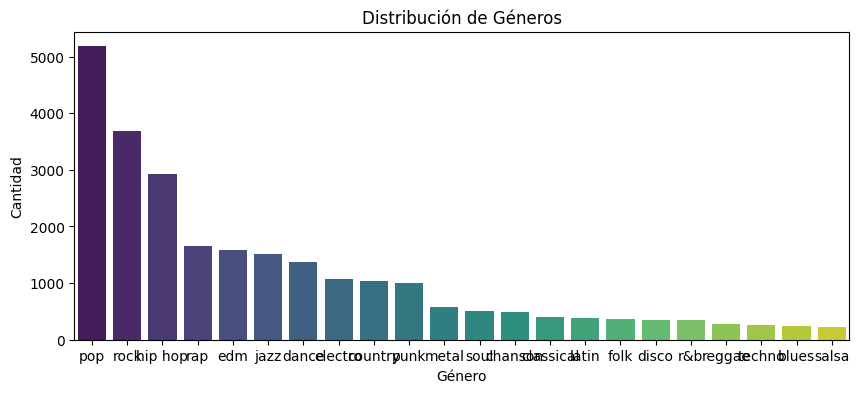

In [11]:


# Contar la cantidad de cada género
conteo_generos = df_train['genre'].value_counts()

# Crear el histograma
plt.figure(figsize=(10, 4))
sns.barplot(x=conteo_generos.index, y=conteo_generos.values, palette='viridis')
plt.title('Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded, test_size=0.2,stratify=y_encoded, random_state=42
)


### SMOTE

In [13]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

c:\Users\barta\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\barta\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\barta\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\barta\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in _

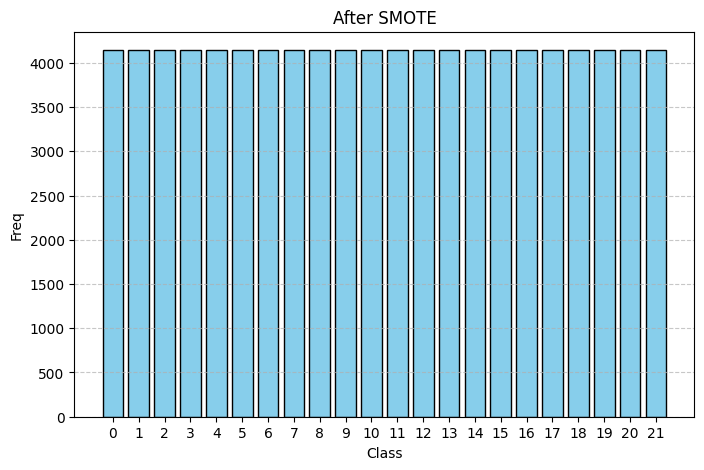

In [14]:
unique_classes, counts = np.unique(y_resampled, return_counts=True)

sorted_indices = np.argsort(unique_classes)
unique_classes_sorted = unique_classes[sorted_indices]
counts_sorted = counts[sorted_indices]

plt.figure(figsize=(8, 5))
plt.bar(unique_classes_sorted, counts_sorted, color='skyblue', edgecolor='black')
plt.title('After SMOTE')
plt.xlabel('Class')
plt.ylabel('Freq')
plt.xticks(unique_classes_sorted)  # Asegura que las clases estén en orden en el eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

redistrib 


In [15]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier

# Exemple avec un Random Forest
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted') #0.46440033281825743
#0.4263581094332222 smote

#wheigted popularity 0.4320999476914835
# wheigted nothing 0.4343358423062858


0.4350834334787284

In [16]:

from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_train, y_train)

KeyboardInterrupt: 

In [ ]:

# Pour l'affichage
for i in result.importances_mean.argsort()[::-1]:
    print(f"{X_train.columns[i]}: {result.importances_mean[i]:.4f}")

days_since_1900: 0.2810
instrumentalness: 0.1723
acousticness: 0.1586
speechiness: 0.1362
explicit: 0.1353
danceability: 0.1145
valence: 0.0532
duration_ms: 0.0525
popularity: 0.0428
energy: 0.0408
tempo: 0.0326
loudness: 0.0272
liveness: 0.0051
mode: 0.0028
key: 0.0018
time_signature: 0.0001


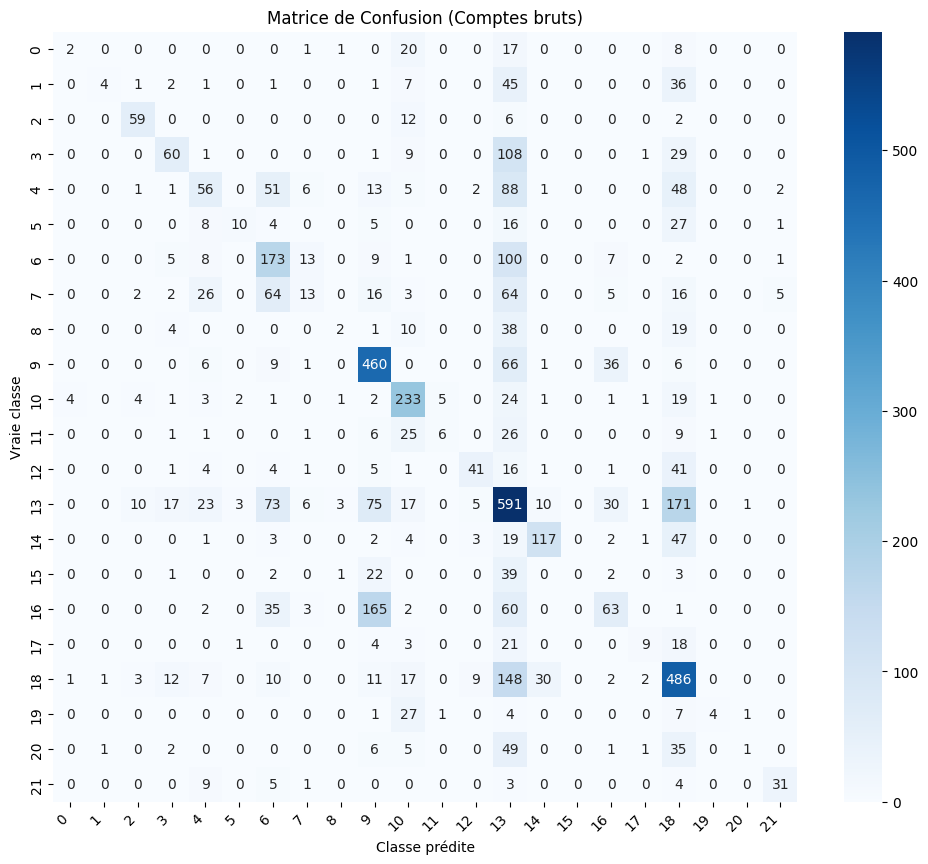

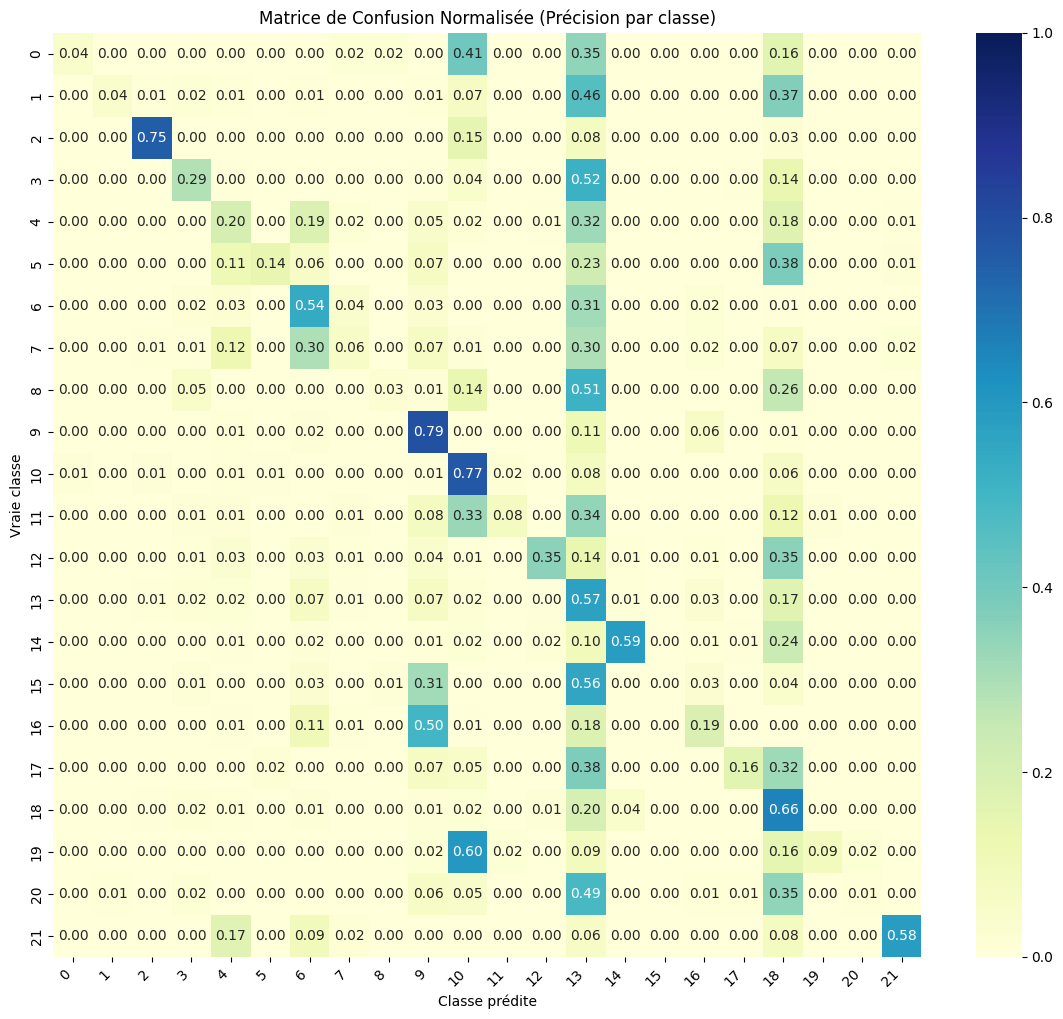

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcul de la matrice
cm = confusion_matrix(y_test, y_pred)

# Récupération des noms de classes (si vous avez un LabelEncoder 'le')
# Sinon, remplacez par une liste manuelle : ['Pop', 'Rock', ...]
# class_names = le.classes_ 
class_names = sorted(list(set(y_test))) # Fallback si pas de le

plt.figure(figsize=(12, 10)) # Grande taille nécessaire pour 23 classes !

sns.heatmap(cm, 
            annot=True,         # Affiche les chiffres dans les cases
            fmt='d',            # Format 'd' pour entiers (pas de notation scientifique)
            cmap='Blues',       # Dégradé de bleu (plus lisible)
            xticklabels=class_names,
            yticklabels=class_names)

plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.title('Matrice de Confusion (Comptes bruts)')
plt.xticks(rotation=45, ha='right') # Rotation pour lire les noms
plt.show()
import numpy as np

# On normalise par ligne ('true') -> La somme de chaque ligne fera 1 (100%)
cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(14, 12))

sns.heatmap(cm_normalized, 
            annot=True, 
            fmt='.2f',          # Affiche 2 décimales (ex: 0.85)
            cmap='YlGnBu',      # Jaune-Vert-Bleu (Jaune = 0%, Bleu foncé = 100%)
            xticklabels=class_names,
            yticklabels=class_names,
            vmin=0, vmax=1)     # Fixe l'échelle entre 0 et 1

plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.title('Matrice de Confusion Normalisée (Précision par classe)')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
est = HistGradientBoostingClassifier().fit(X_train,y_train)
train_score = est.score(X_train, y_train)
print(f"Score sur l'entraînement : {train_score:.3f}")

# 3. Prédiction et évaluation sur le test
y_pred = est.predict(X_test)
test_f1 = f1_score(y_test, y_pred, average='micro')
print(f"F1-score sur le test : {test_f1:.3f}")


Score sur l'entraînement : 0.777
F1-score sur le test : 0.467


In [ ]:
# Pour l'affichage
for i in result.importances_mean.argsort()[::-1]:
    print(f"{X_test.columns[i]}: {result.importances_mean[i]:.4f}")

days_since_1900: 0.2810
instrumentalness: 0.1723
acousticness: 0.1586
speechiness: 0.1362
explicit: 0.1353
danceability: 0.1145
valence: 0.0532
duration_ms: 0.0525
popularity: 0.0428
energy: 0.0408
tempo: 0.0326
loudness: 0.0272
liveness: 0.0051
mode: 0.0028
key: 0.0018
time_signature: 0.0001


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# --- 1. Configuration du Modèle ---
# On utilise 'Balanced' pour que le modèle s'adapte tout seul aux classes rares
# On active l'Early Stopping pour qu'il s'arrête dès qu'il commence à apprendre par cœur
model = CatBoostClassifier(
    iterations=2000,            # Nombre max d'arbres (on vise haut, l'early stopping arrêtera avant)
    learning_rate=0.05,         # Vitesse d'apprentissage modérée pour éviter de "sauter" les minimums
    depth=10,                    # Profondeur de l'arbre (6 est un bon standard, monter à 8 ou 10 si c'est trop simple)
    loss_function='MultiClass', # Indispensable pour tes 23 classes
    eval_metric='MultiClass',   # Métrique de suivi interne
    auto_class_weights='Balanced', # LA CLÉ : Remplace SMOTE et class_weights manuels
    task_type="GPU",            # Passe à "GPU" si tu as une carte graphique compatible (beaucoup plus rapide)
    early_stopping_rounds=100,
    random_seed=42,
    verbose=200                 # Affiche l'avancement toutes les 200 itérations
)


print("Démarrage de l'entraînement...")
model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),  # On surveille la performance sur le Test en temps réel
    plot=True                   # Ouvre une jolie courbe interactive (si tu es dans un Notebook)
)

# --- 3. Évaluation ---
print("\n--- Meilleure itération trouvée : ---")
print(model.get_best_iteration())

# Prédictions
y_pred = model.predict(X_test)

# Rapport complet
print("\n--- Rapport de Classification (Focus sur Macro Avg) ---")
print(classification_report(y_test, y_pred))

Démarrage de l'entraînement...


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

KeyboardInterrupt: 

         Feature Id  Importances
0  instrumentalness    14.873029
1   days_since_1900    10.360989
2       duration_ms     9.629528
3      acousticness     9.128870
4      danceability     9.049923
5           valence     7.353196
6        popularity     7.263934
7             tempo     6.808362
8       speechiness     6.225163
9            energy     5.480564


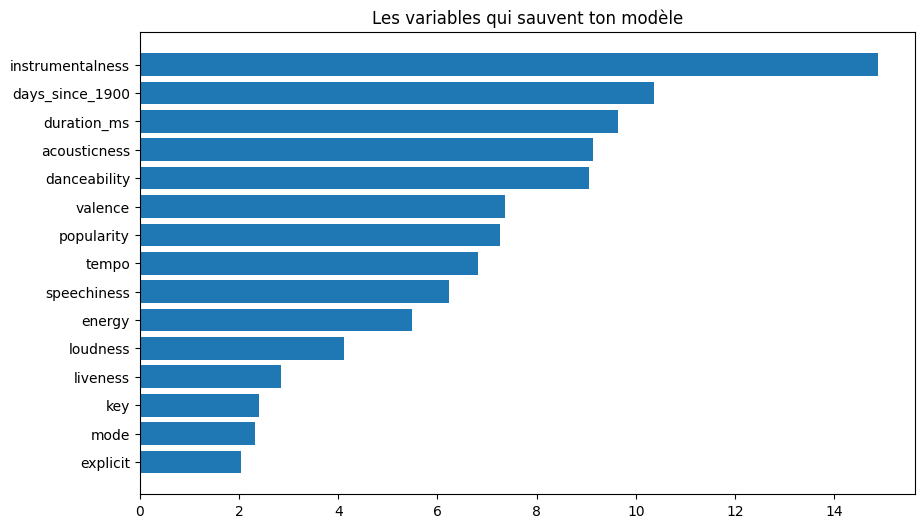

In [ ]:
# Feature Importance selon CatBoost
feature_importance = model.get_feature_importance(prettified=True)
print(feature_importance.head(10))

# Visualisation simple
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature Id'][:15], feature_importance['Importances'][:15])
plt.gca().invert_yaxis()
plt.title("Les variables qui sauvent ton modèle")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# 1. Définition du dictionnaire de mapping
genre_mapping = {
    # Famille 0: Electronic & Pop
    'pop': 0, 'dance': 0, 'edm': 0, 'electro': 0, 'techno': 0, 'disco': 0,
    
    # Famille 1: Urban & Groove
    'rap': 1, 'hip hop': 1, 'r&b': 1, 'reggae': 1, 'soul': 1,
    
    # Famille 2: Rock & Intense
    'rock': 2, 'metal': 2, 'punk': 2,
    
    # Famille 3: Acoustic & Organic (Le reste)
    'classical': 3, 'jazz': 3, 'blues': 3, 'folk': 3, 'country': 3, 
    'chanson': 3, 'latin': 3, 'salsa': 3
}


def get_family_from_genre_id(genre_id_array, label_encoder, genre_mapping_dict):
    # 1. On décode les IDs (0-22) vers les Noms ('rock', 'pop'...)
    noms = label_encoder.inverse_transform(genre_id_array)
    # 2. On map les Noms vers les Familles (0-3)
    familles = [genre_mapping_dict[nom] for nom in noms]
    return np.array(familles)
y_train_famille = get_family_from_genre_id(y_train, label_encoder_y, genre_mapping)
y_test_famille = get_family_from_genre_id(y_test, label_encoder_y, genre_mapping)

In [ ]:
# On utilise un Random Forest robuste (moins de tuning nécessaire que Boosting)
glouton_model = RandomForestClassifier(n_estimators=200, max_depth=15, class_weight='balanced', random_state=42)

print("Entraînement du Modèle Glouton (Familles)...")
glouton_model.fit(X_train, y_train_famille)
y_pred = glouton_model.predict(X_test)
# Évaluation rapide
print("Score Glouton :", glouton_model.score(X_test, y_test_famille))
test_f1 = f1_score(y_test_famille, y_pred, average='micro')
print(f"F1-score sur le test : {test_f1:.3f}")

Entraînement du Modèle Glouton (Familles)...
Score Glouton : 0.702490684447931
F1-score sur le test : 0.702


In [ ]:
from catboost import CatBoostClassifier

# Dictionnaire pour stocker tes 4 modèles entraînés
# Clé = ID de la famille (0, 1, 2, 3), Valeur = Le modèle entraîné
modeles_specialistes = {}

# Liste des familles (0: Electro, 1: Urban, 2: Rock, 3: Acoustic)
familles_ids = [0, 1, 2, 3]

for famille_id in familles_ids:
    print(f"\n--- Entraînement du Spécialiste pour la Famille {famille_id} ---")
    
    # 1. FILTRAGE : On ne garde que les données de CETTE famille
    # On utilise le masque sur y_super (tes cibles familles)
    mask_train = (y_train_famille == famille_id)
    
    X_train_local = X_train[mask_train]
    y_train_local = y_train[mask_train] # Les VRAIS labels (ex: Metal, Punk...)
    
    # 2. REMAPPING (Astuce de pro)
    # CatBoost préfère souvent des classes de 0 à N. 
    # Si tes labels sont [5, 10, 15], on les transforme temporairement en [0, 1, 2]
    # On garde le "decodeur" pour remettre les bons noms à la fin
    local_encoder = LabelEncoder()
    y_train_local_encoded = local_encoder.fit_transform(y_train_local)
    
    # 3. CRÉATION DU MODÈLE
    # Tu peux changer les hyperparamètres ici si une famille est plus dure que les autres
    clf = CatBoostClassifier(
        iterations=500,
        learning_rate=0.05,
        depth=6,
        loss_function='MultiClass',
        verbose=100,
        allow_writing_files=False
    )
    
    # 4. ENTRAÎNEMENT
    clf.fit(X_train_local, y_train_local_encoded)
    
    # 5. STOCKAGE
    # On sauvegarde le modèle ET son encodeur spécifique
    modeles_specialistes[famille_id] = {
        'model': clf,
        'encoder': local_encoder
    }
    
print("\nLes 4 spécialistes sont entraînés !")


--- Entraînement du Spécialiste pour la Famille 0 ---
0:	learn: 1.7209712	total: 12.2ms	remaining: 6.11s
100:	learn: 0.9594574	total: 622ms	remaining: 2.46s
200:	learn: 0.8721650	total: 1.27s	remaining: 1.89s
300:	learn: 0.8097271	total: 1.94s	remaining: 1.28s
400:	learn: 0.7562275	total: 2.55s	remaining: 629ms
499:	learn: 0.7085427	total: 3.14s	remaining: 0us

--- Entraînement du Spécialiste pour la Famille 1 ---
0:	learn: 1.5567522	total: 6.27ms	remaining: 3.13s
100:	learn: 0.8110583	total: 517ms	remaining: 2.04s
200:	learn: 0.7121828	total: 1s	remaining: 1.49s
300:	learn: 0.6426527	total: 1.48s	remaining: 978ms
400:	learn: 0.5839133	total: 1.94s	remaining: 479ms
499:	learn: 0.5315855	total: 2.39s	remaining: 0us

--- Entraînement du Spécialiste pour la Famille 2 ---
0:	learn: 1.0556888	total: 3.37ms	remaining: 1.68s
100:	learn: 0.4318787	total: 321ms	remaining: 1.27s
200:	learn: 0.3745417	total: 676ms	remaining: 1.01s
300:	learn: 0.3333143	total: 1s	remaining: 662ms
400:	learn: 0.30

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report

def predict_hierarchique(X_new):
    # Sécurité : Conversion en array numpy
    if isinstance(X_new, pd.DataFrame):
        X_new = X_new.values
        
    predictions_noms = [] 
    
    # 1. Prédiction Glouton
    familles_predites = glouton_model.predict(X_new) 
    
    # 2. Boucle par chanson
    for i, famille_id in enumerate(familles_predites):
        
        # Nettoyage ID Famille
        famille_id = int(famille_id.item()) if hasattr(famille_id, 'item') else int(famille_id)
        
        # Récupération du spécialiste
        specialiste_info = modeles_specialistes[famille_id]
        model_spec = specialiste_info['model']
        encoder_spec = specialiste_info['encoder'] # Encodeur Local
        
        # Isolation ligne
        chanson_X = X_new[i].reshape(1, -1)
        
        # Prédiction ID Local (ex: 0 pour le 1er genre de la famille)
        pred_locale_id = model_spec.predict(chanson_X)
        idx_pred = int(pred_locale_id.item()) if hasattr(pred_locale_id, 'item') else int(pred_locale_id)
        
        # --- ETAPE 1 : ID Local -> ID Global ---
        # L'encodeur local nous renvoie le chiffre global (ex: 15 pour Metal)
        global_id = encoder_spec.inverse_transform([idx_pred])[0]
        
        # --- ETAPE 2 (AJOUTÉE) : ID Global -> Nom (String) ---
        # On utilise l'encodeur GLOBAL pour traduire 15 en "metal"
        # Assurez-vous que label_encoder_y est bien défini dans votre notebook
        vrai_nom = label_encoder_y.inverse_transform([global_id])[0]
        
        predictions_noms.append(vrai_nom)
        
    return np.array(predictions_noms)

# --- 3. Lancement et Évaluation ---

print("Lancement des prédictions hiérarchiques...")

# A. On obtient les prédictions sous forme de TEXTE (ex: ['metal', 'pop', ...])
y_pred_noms = predict_hierarchique(X_test)

# B. On convertit la vérité terrain (y_test qui est chiffré) en TEXTE aussi
# label_encoder_y est ton encodeur GLOBAL (celui du début du projet)
y_test_noms = label_encoder_y.inverse_transform(y_test)

print("\n--- PERFORMANCE GLOBALE (HIÉRARCHIQUE) ---")

# C. Maintenant on compare TEXTE vs TEXTE. Aucune ambiguïté possible.
f1 = f1_score(y_test_noms, y_pred_noms, average='macro')
print(f"F1-Score Macro : {f1:.4f}")

# D. Rapport complet
print("\n" + classification_report(y_test_noms, y_pred_noms))

Lancement des prédictions hiérarchiques...


c:\Users\barta\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



--- PERFORMANCE GLOBALE (HIÉRARCHIQUE) ---
F1-Score Macro : 0.3670

              precision    recall  f1-score   support

       blues       0.21      0.22      0.22        49
     chanson       0.24      0.14      0.18        98
   classical       0.76      0.82      0.79        79
     country       0.34      0.43      0.38       209
       dance       0.39      0.22      0.28       274
       disco       0.45      0.21      0.29        71
         edm       0.42      0.62      0.50       319
     electro       0.28      0.10      0.14       216
        folk       0.21      0.16      0.18        74
     hip hop       0.57      0.80      0.66       585
        jazz       0.51      0.78      0.62       303
       latin       0.33      0.12      0.17        76
       metal       0.56      0.39      0.46       116
         pop       0.39      0.44      0.42      1036
        punk       0.71      0.58      0.64       199
         r&b       0.00      0.00      0.00        70
         rap

In [ ]:
y_test_noms[:5]

array(['pop', 'rock', 'latin', 'rock', 'rock'], dtype=object)

In [ ]:
import pandas as pd
import numpy as np

# 1. NETTOYAGE : On vire les boulets qui font du bruit
cols_to_drop = ['mode', 'key', 'liveness'] 
# Vérifie que ces colonnes existent avant de drop
X_train_optim = X_train.drop(columns=[c for c in cols_to_drop if c in X_train.columns])
X_test_optim = X_test.drop(columns=[c for c in cols_to_drop if c in X_test.columns])

# 2. FEATURE ENGINEERING : On crée des "Super-Features"
# L'idée est de capturer des concepts physiques

def create_interactions(df):
    df_new = df.copy()
    
    # A. "L'Intensité Perçue" : Énergie x Volume
    # Un morceau fort ET énergique = Metal/Techno
    df_new['intensity'] = df_new['energy'] * df_new['loudness']
    
    # B. "Le Groove" : Danceability / Tempo
    # Certains genres sont lents mais très dansants (Hip Hop), d'autres rapides mais raides (Rock)
    # On ajoute +1 pour éviter la division par zéro si tempo = 0
    df_new['groove_factor'] = df_new['danceability'] / (df_new['tempo'] + 1)
    
    # C. "L'Organicité Pure" : Acousticness x (1 - Energy)
    # Pour mieux isoler le Classique/Folk de la "Chanson calme"
    df_new['pure_acoustic'] = df_new['acousticness'] * (1 - df_new['energy'])
    
    # D. "La Modernité" : Interaction Date x Loudness
    # La musique récente est compressée et plus forte (Loudness War)
    if 'days_since_1900' in df_new.columns:
         df_new['modern_loudness'] = df_new['days_since_1900'] * df_new['loudness']
         
    return df_new

print("Création des nouvelles features...")
X_train_final = create_interactions(X_train_optim)
X_test_final = create_interactions(X_test_optim)

print(f"Nouvelles dimensions : {X_train_final.shape}")

Création des nouvelles features...
Nouvelles dimensions : (20393, 17)


In [ ]:
from catboost import CatBoostClassifier

# 1. NETTOYAGE RADICAL
# On enlève les variables inutiles identifiées dans ton graphique 3
cols_to_drop = ['mode', 'key', 'liveness', 'explicit'] 
# 'explicit' semble faible aussi, on peut tenter de l'enlever pour simplifier
X_train_clean = X_train_final.drop(columns=[c for c in cols_to_drop if c in X_train_final.columns])
X_test_clean = X_test_final.drop(columns=[c for c in cols_to_drop if c in X_test_final.columns])

# 2. CONFIGURATION "SEVRAGE"
model_ultimate = CatBoostClassifier(
    iterations=3000,
    learning_rate=0.02,         # Plus lent pour plus de finesse
    depth=6,
    l2_leaf_reg=7,              # Forte régularisation
    
    # LA CLÉ DU SUCCÈS : 
    # On force chaque arbre à n'utiliser que 50% des features (rsm = Random Subspace Method)
    # Comme 'days_since_1900' ne sera dispo que 1 fois sur 2, 
    # le modèle SERA OBLIGÉ d'utiliser 'intensity' et 'groove_factor' pour compenser.
    rsm=0.5,                    
    
    loss_function='MultiClass',
    auto_class_weights='SqrtBalanced',
    early_stopping_rounds=200,
    verbose=200,
    task_type="CPU",
    random_seed=42
)

print("Lancement du Modèle Ultime (Mode Sevrage)...")
model_ultimate.fit(
    X_train_clean, y_train,
    eval_set=(X_test_clean, y_test),
    plot=False
)

# Résultats
y_pred_ult = model_ultimate.predict(X_test_clean)
print(classification_report(label_encoder_y.inverse_transform(y_test), 
                            label_encoder_y.inverse_transform(y_pred_ult.flatten())))

Lancement du Modèle Ultime (Mode Sevrage)...
0:	learn: 3.0628905	test: 3.0634589	best: 3.0634589 (0)	total: 40.4ms	remaining: 2m 1s
200:	learn: 1.8907436	test: 1.9548257	best: 1.9548257 (200)	total: 8.05s	remaining: 1m 52s
400:	learn: 1.7095619	test: 1.8286752	best: 1.8286752 (400)	total: 17.8s	remaining: 1m 55s
600:	learn: 1.6061196	test: 1.7746885	best: 1.7746885 (600)	total: 26.4s	remaining: 1m 45s
800:	learn: 1.5392133	test: 1.7457444	best: 1.7457444 (800)	total: 35.2s	remaining: 1m 36s
1000:	learn: 1.4851026	test: 1.7273432	best: 1.7273324 (999)	total: 44.1s	remaining: 1m 28s
1200:	learn: 1.4354249	test: 1.7141198	best: 1.7141198 (1200)	total: 52.9s	remaining: 1m 19s
1400:	learn: 1.3891909	test: 1.7037997	best: 1.7037997 (1400)	total: 1m 1s	remaining: 1m 10s
1600:	learn: 1.3479924	test: 1.6947954	best: 1.6947954 (1600)	total: 1m 10s	remaining: 1m 1s
1800:	learn: 1.3083680	test: 1.6887951	best: 1.6887691 (1799)	total: 1m 19s	remaining: 53s
2000:	learn: 1.2710471	test: 1.6840141	bes

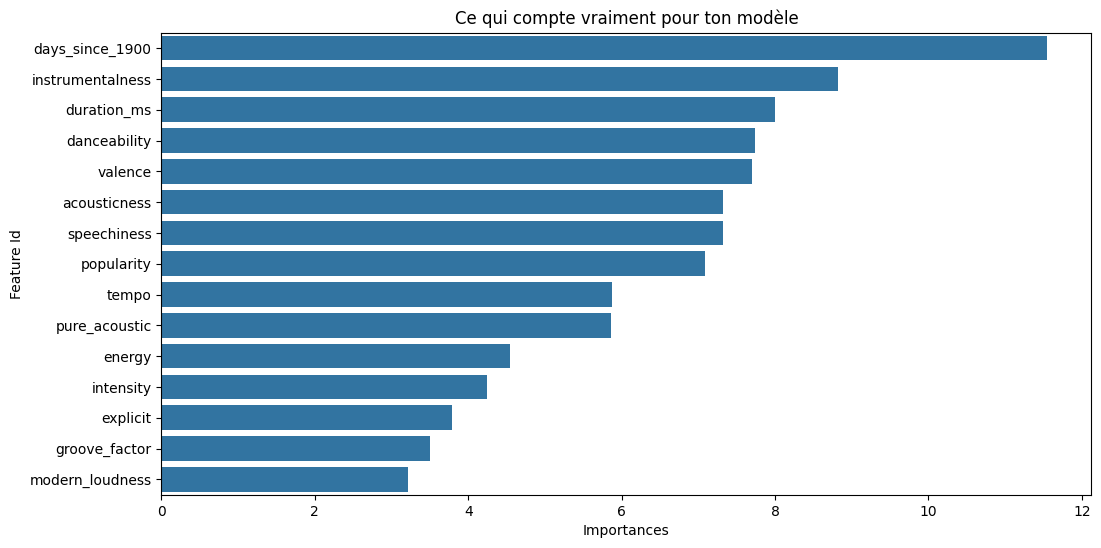

         Feature Id  Importances
0   days_since_1900    11.547995
1  instrumentalness     8.820973
2       duration_ms     8.005207
3      danceability     7.738507
4           valence     7.703050
5      acousticness     7.324623
6       speechiness     7.316769
7        popularity     7.085013
8             tempo     5.873759
9     pure_acoustic     5.867924


In [ ]:
# Affiche l'importance des variables
feature_importance = model_final.get_feature_importance(prettified=True)

plt.figure(figsize=(12, 6))
sns.barplot(x="Importances", y="Feature Id", data=feature_importance.head(15))
plt.title('Ce qui compte vraiment pour ton modèle')
plt.show()

print(feature_importance.head(10))

In [17]:
from sklearn.model_selection import train_test_split

X = df_train.drop(columns=['genre'])
y = df_train['genre']

pipeline_X = Pipeline([
    ('feature_eng', MusicFeatureEngineering())])

label_encoder_y = LabelEncoder()
X_processed = pipeline_X.fit_transform(X)
y_encoded = label_encoder_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded, test_size=0.2,stratify=y_encoded, random_state=42
)


In [18]:
from lightgbm import LGBMClassifier
LGBM = LGBMClassifier(n_estimators=500, random_state=42, verbose=-1,)
LGBM.fit(X_train, y_train)

LGBMClassifier(n_estimators=500, random_state=42, verbose=-1)

In [19]:
#processing 
X = df_test
pipeline_X = Pipeline([
    ('feature_eng', MusicFeatureEngineering())])
X_processed = pipeline_X.fit_transform(X)

y_pred = LGBM.predict(X_processed)

y_pred_val_lgbm = label_encoder_y.inverse_transform(LGBM.predict(X_processed))
y_pred_val_lgbm

array(['pop', 'rock', 'pop', ..., 'rock', 'dance', 'rock'],
      shape=(2833,), dtype=object)

In [22]:
df_final = pd.DataFrame(y_pred_val_lgbm, columns=['genre'])

# Sauvegarder
df_final.to_csv('spotify_predictions.csv', index=False)